# Logistic Regression (Hồi quy Logistic)


1. Cài đặt thuật toán.
2. Sử dụng các thư viện khác. Ứng dụng trên bài toán đơn giản.
3. `Nhận xét`, `Ưu điểm `, `Nhược điểm `.

## 1. Cài đặt thuật toán

### Các thư viện tính toán

In [1]:
import numpy as np
import matplotlib.pyplot as plt

### Thiết lập hàm sigmoid

In [2]:
def sigmoid(S):
    return 1/(1 + np.exp(-S))

### Thiết lập hàm xác suất

In [3]:
def prob(w, X):
    return sigmoid(X.dot(w))

### Thiết lập hàm mất mát

In [4]:
def loss(w, X, y, lam):
    z = prob(w, X)
    return -np.mean(y*np.log(z) + (1-y)*np.log(1-z)) + 0.5*lam/X.shape[0]*np.sum(w*w)

### Sử dụng thuật toán gradient descent (Stochastic gradient descent)

In [5]:
def logistic_regression(w_init, X, y, lam = 0.001, lr = 0.1, nepoches = 2000):
    # lam - regularization paramether, lr - learning rate, nepoches - number of epoches
    N, d = X.shape[0], X.shape[1]
    w = w_old = w_init 
    # store history of loss in loss_hist
    loss_hist = [loss(w_init, X, y, lam)]
    ep = 0 
    while ep < nepoches: 
        ep += 1
        mix_ids = np.random.permutation(N)
        for i in mix_ids:
            xi = X[i]
            yi = y[i]
            zi = sigmoid(xi.dot(w))
            w = w - lr*((zi - yi)*xi + lam*w)
        loss_hist.append(loss(w, X, y, lam))
        if np.linalg.norm(w - w_old)/d < 1e-6:
            break 
        w_old = w
    return w, loss_hist 

### Hàm dự đoán

In [6]:
def predict(w, X, threshold=0.5):
    res = np.zeros(X.shape[0])
    res[np.where(prob(w,X)>threshold)[0]] = 1
    return res

## 2. Sử dụng các thư viện hỗ trợ

In [7]:
from sklearn.linear_model import LogisticRegression

### Bài toán thời gian ôn thi và kết quả của thí sinh
#### Sử dụng thuật toán cài đặt

In [8]:
X = np.array([[0.50, 0.75, 1.00, 1.25, 1.50, 1.75, 1.75, 2.00, 2.25, 2.50, 
              2.75, 3.00, 3.25, 3.50, 4.00, 4.25, 4.50, 4.75, 5.00, 5.50]])
y = np.array([0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1])
print(X)
print(y)
print(X.shape)
print(y.shape)

[[0.5  0.75 1.   1.25 1.5  1.75 1.75 2.   2.25 2.5  2.75 3.   3.25 3.5
  4.   4.25 4.5  4.75 5.   5.5 ]]
[0 0 0 0 0 0 1 0 1 0 1 0 1 0 1 1 1 1 1 1]
(1, 20)
(20,)


[0, 1, 2, 3, 4, 5, 7, 9, 11, 13]
[6, 8, 10, 12, 14, 15, 16, 17, 18, 19]
[array([0.5 , 0.75, 1.  , 1.25, 1.5 , 1.75, 2.  , 2.5 , 3.  , 3.5 ])] [0 0 0 0 0 0 0 0 0 0]


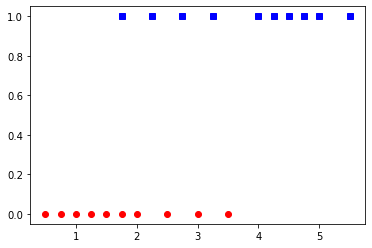

In [9]:
index_0 = []
index_1 = []
for i in range(y.shape[0]):
    if y[i] == 0:
        index_0.append(i)
    if y[i] == 1:
        index_1.append(i)
print(index_0)
print(index_1)
print(list(X[:,index_0]),y[index_0])
plt.plot(X[:,index_0].reshape(-1,1),y[index_0],'ro')
plt.plot(X[:,index_1].reshape(-1,1),y[index_1],'bs')
plt.show()

In [10]:
# Chuẩn hóa dữ liệu
X = np.array([[0.50, 0.75, 1.00, 1.25, 1.50, 1.75, 1.75, 2.00, 2.25, 2.50, 
              2.75, 3.00, 3.25, 3.50, 4.00, 4.25, 4.50, 4.75, 5.00, 5.50]]).T
y = np.array([0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1])
X_bar = np.concatenate((np.ones((X.shape[0],1)), X), axis = 1)
print(X_bar)

[[1.   0.5 ]
 [1.   0.75]
 [1.   1.  ]
 [1.   1.25]
 [1.   1.5 ]
 [1.   1.75]
 [1.   1.75]
 [1.   2.  ]
 [1.   2.25]
 [1.   2.5 ]
 [1.   2.75]
 [1.   3.  ]
 [1.   3.25]
 [1.   3.5 ]
 [1.   4.  ]
 [1.   4.25]
 [1.   4.5 ]
 [1.   4.75]
 [1.   5.  ]
 [1.   5.5 ]]


In [11]:
w_init = np.random.randn(X_bar.shape[1])
lam = 0.0001
w, loss_hist = logistic_regression(w_init, X_bar, y, lam, lr = 0.05, nepoches = 500)
print('Solution of Logistic Regression:', w)
print('Final loss:', loss(w, X_bar, y, lam))
print(loss_hist[-1])

Solution of Logistic Regression: [-4.06790627  1.59722251]
Final loss: 0.40591644166193036
0.40591644166193036


####  Dự đoán một người ôn thi 1.5 h và một người ôn thi 4h

In [12]:
X_test = np.array([[1, 1.5],[1, 4]])

In [13]:
print(prob(w,X_test))

[0.15814805 0.91060006]


In [14]:
print(predict(w,X_test))

[0. 1.]


### Độ chính xác của mô hình

In [15]:
y_predict = predict(w,X_bar)
print(y_predict)

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]


In [16]:
y_train = y
print(y_train)

[0 0 0 0 0 0 1 0 1 0 1 0 1 0 1 1 1 1 1 1]


In [22]:
def accuracy(y_predict, y_train):
    n = len(y_train)
    sum = 0
    for i in range(n):
        if y_predict[i] == y_train[i]:
           sum = sum + 1
    return sum/n

In [25]:
print("Độ chính xác trên tập train", 100*accuracy(y_predict, y_train),"%")

Độ chính xác trên tập train 80.0 %


### Sử dụng thư viện hỗ trợ sklearn

In [18]:
model_logis = LogisticRegression(random_state=0).fit(X, y)

In [19]:
model_logis.predict(np.array([[1.5],[4]]))

array([0, 1])

In [20]:
model_logis.predict_proba(np.array([[1.5],[4]]))

array([[0.80480773, 0.19519227],
       [0.18924992, 0.81075008]])

In [21]:
print(model_logis.coef_,model_logis.intercept_)

[[1.14860386]] [-3.13952411]


### Mô hình LR phân loại Hoa, độ chính xác: 100%

### Mô hình LR trong bài toán phân loại chữ số viết tay: 99%

## 3. Ưu nhược điểm

- Thường áp dụng cho các bài toán phân lớp nhị phân.
- Không yêu cầu giả thuyết tuyến tính (gần tuyến tính).
- Sử dụng trong các bài toán Classification.
- Ngưỡng quyết định có thể thay đổi (trong các bài toán quan trọng).
- Mô hình Softmax regression: phân nhiều lớp dữ liệu.